# E-Commerce Text Classification

***Background & Context***

Product categorization also referred to as product classification, is a field of study within natural language processing (NLP). It is also one of the biggest challenges for e-commerce companies. With the advancement of AI technology, researchers have been applying machine learning to product categorization problems.

Product categorization is the placement and organization of products into their respective categories. In that sense, it sounds simple: choose the correct department for a product. However, this process is complicated by the sheer volume of products on many e-commerce platforms. Furthermore, many products could belong to multiple categories.

***Objective***

* Correctly categorize product for e-commerce company so that search engine (such as google) fethes product quickly which will in tern result in customer finding e-commerce site quickily

* Use Machine Learning Algorithm to do Text/Product classification.

***Key Steps***
Below key steps needs to be performed for proper product classification

* Understand the e-comm dataset
* Perform text preprocesing
* Create features using Bag Of Words( CountVectorizer & TF-Idf)
* Build the classfication Model
* Evaluate the Model

***DataSet***
The Dataset has 2 columns
* Label : This column indicates the product class
* Text : Observation for a given product class.


## Introductory Steps

### Import Libraries

In [1]:
# Download and Install necessary module

! pip install contractions                                                        # install the contractions library
import nltk                                                                       # Natural language processing toolkit librarynltk.download('stopwords')                                                        # Download english stopwords                                         
nltk.download('punkt')                                                            # Download Sentence tokenizer
nltk.download('wordnet')                                                          # Download english Lexical(noun , verb, adverb , adjective) database
nltk.download('omw-1.4')                                                          # Download Open Multilingual Wordnet

# Import necessary Library

from google.colab import drive                                                    # Library for connecting to google drive

import warnings                                                                   # Import python librtary for warnings
warnings.filterwarnings('ignore')                                                 # Ignore warnings 

import numpy as np                                                                # Import library for mathematical operations
import pandas as pd                                                               # Import pandas for data manupulation
import matplotlib.pyplot as  plt                                                  # Import pyplot library for for graph and images
import seaborn as sns                                                             # Import seaborn library for graph and images

import string                                                                     # Import String Constants 
                                                                                  
import re                                                                         # import regular expression operation
import unicodedata                                                                # Library to access unicode database 


from nltk.tokenize import word_tokenize                                           # Import library for word tokenizer       
from nltk.corpus import stopwords                                                 # Import library for english stopwords database       
from nltk.stem.wordnet import WordNetLemmatizer                                   # Import library for lemmitizer     
import contractions                                                               # Import library to remove contractions       
from bs4 import BeautifulSoup                                                     # Import library BeautifulSoup library to treat HTML tags      


from sklearn.feature_extraction.text import CountVectorizer                       # Import CountVectorizer sklearn library for Bag Of Word analysis     
from sklearn.feature_extraction.text import TfidfVectorizer                       # Import TfidfVectorizer sklearn library to convert raw document to a matrix of TF-IDF features       

from wordcloud import WordCloud , STOPWORDS                                       # Import wordcloud library to build wordcloud     


from sklearn.model_selection import train_test_split , cross_val_score            # sklearn library for train & test split and cross val score     

from sklearn.ensemble import RandomForestClassifier                               # Import Randomforestclassifier for modeling     

from sklearn.metrics import classification_report                                 # Import sklearn metrics library for classification report      
from sklearn.metrics import accuracy_score                                        # Import library metrices

from sklearn import preprocessing                                                 # Import sklearn preprocessing library
from sklearn import metrics                                                       # sklearn library for metrics
from sklearn.metrics import confusion_matrix                                      # Import sklearn library to build confusion matrix


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Load Dataset

In [2]:
drive.mount("/content/drive")                                                     # Mount google drive

google_file = "/content/drive/My Drive/colab_notebooks/NaturalLanguageProcessing/ecomm_text_classification/ecommerceDataset.csv"

ecomm = pd.read_csv(google_file)                                                  # Read ecomm csv file from google drive



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Describe Dataset

In [3]:
pd.set_option('display.max_colwidth' , None)                                     # display full data frame columns (Text without truncating)  

ecomm.head()                                                                     # display the top 5 records from ecomm dataset

,Label,Text
0,Household,"Styleys Wrought Iron Coat Rack Hanger Creative Fashion Bedroom for Hanging Clothes Shelves, Wrought Iron Racks Standing Coat Rack (Black) Color Name:Black Styleys Coat Stand is great for homes and rooms with limited space, as having one standing rack takes up less space compared to drawers and cupboards. Easy for guests to keep their items, especially bags and scarves, when visiting, as they can always keep an eye on it and easily grab it when they're leaving. Makes a smart décor piece for your home or room as occupied stands can show off your stylish handbags, accessories, and hangman achievement medals. Dimensions: 45cm x 31cm x 175cm Weight: 2.4kg Material: steel Colour: white, black, or pink No. of hook: 7 + 3 (straight pegs) Suitable to hang coats, clothes, scarves, handbags, hats, and accessories"
1,Household,"Cuisinart CCO-50BKN Deluxe Electric Can Opener, Black Size:None | Color Name:Black Style, convenience, and power come together in the Cuisinart electric can open. With chrome accents and elegant contours, it fits nicely with other modern countertop appliances. The easy single-touc"
2,Household,Anchor Penta 6 Amp 1 -Way Switch (White) - Pack of 20 Anchor Penta 6 Amp 1 -Way Switch (White)- Pack of 20 comes with Spark Shield - Concealed Terminals - Silver Cadmium Contacts - IP 20 Protection - Captive Screw.
3,Clothing & Accessories,"Proline Men's Track Jacket Proline Woven, 100% Polyester High neck Wind Cheater with colour Blocked Detail"
4,Household,"Chef's Garage 2 Slot Edge Grip Kitchen Knife Sharpener, Helps to Sharpen The Dull Knives (Black) Chef's Garage Mini Knife sharpener helps to sharpen your dull knives. This tiny knife sharpener has 2 stage sharpening system. First stage is for damaged and dull knives, it will sharpen the knife on the coarse slot. The coarse slot is made of carbide. Second stage is fine slot, once you have honed the knife on coarse slot it will helps to give the finishing touch. The fine slot is made of ceramic for fine sharpening. It’s give a quick touch up on already sharper knives or for finishing off knives that have already passed through the coarse slot.Also it comes with one of the unique edge grip feature to sharpen on the edge of the table or counter top. Key Features: Very easy to use. Non-slip base for added stability and control Carbide and ceramic blades on these sharpening slots are long lasting. Strong and hard with flexibility of an edge grip feature for bigger knives Small in size 9.50 x 5.0 x 4.50 cms. Weights less - 70 grams Instructions:1. Insert the blade into the slot at a 90-degree angle to the mini sharpener.2. Place the edge in coarse slot (Black in color)3. Pull the knife straight back towards you 2 to 3 times while applying a light pressure.4. Place the blade in fine slot (White in color)5. Pull the knife straight back towards you 5 to 6 times while applying a heavy pressure.6. If blade is still dull repeat these steps until blade is sharp."


In [4]:
print( "The number of rows : " , ecomm.shape[0] , "\nThe number of columns " , ecomm.shape[1])

The number of rows :  50424 
The number of columns  2


***Observation***

1. Data set have 50424 rows (instances) and 2 columns.
2. Label : Represent label for the product
3. Text  : A description about the product 

In [5]:
# Describe ecomm dataset statistics such as coulmns their counts , number of unique values of columns ect.
ecomm.describe().T                                                        

,count,unique,top,freq
Label,50424,4,Household,19312
Text,50423,27801,"Think & Grow Rich About the Author NAPOLEON HILL, born in Pound, Southwest Virginia in 1883, was a very successful American author in the area of the new thought movement—one of the earliest producers of the modern genre of personal-success literature. He is widely considered to be one of the great writers on success. The turning point in Hill’s life occurred in the year 1908 when he interviewed the industrialist Andrew Carnegie—one of the most powerful men in the world at that time, as part of an assignment—an interview which ultimately led to the publication of Think and Grow Rich, one of his best-selling books of all time. the book examines the power of personal beliefs and the role they play in personal success. Hill, who had even served as the advisor to President Franklin D. Roosevelt from 1933-36, passed away at the age of 87.",30


In [6]:
# Print the concise summary of ecomm DataSet
ecomm.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50424 entries, 0 to 50423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   50424 non-null  object
 1   Text    50423 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


***Observation***

* There are 4 unique value for the Label , "Household" label has appeared maximum numbers of time in column.
* There is one missing value for the text column.
* It looks like "Text" columns has quite a few alot of duplicate values. This needs to be invetigated.
* Both Label and Text columns are Object Data type

## Preprocessing


In [7]:
print("The data type of the first value of the Text columns " , type(ecomm['Text'][0]))

The data type of the first value of the Text columns  <class 'str'>


In [8]:
# Drop the row with null values and reset the index
ecomm = ecomm.dropna().reset_index(drop=True)     

In [9]:
# Print the concise details about ecomm Dataset after dropping null rows
ecomm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50423 entries, 0 to 50422
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   50423 non-null  object
 1   Text    50423 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


In [10]:
# Print the unique values for Label columns
ecomm['Label'].value_counts()

Household                 19312
Books                     11820
Electronics               10621
Clothing & Accessories     8670
Name: Label, dtype: int64

In [11]:
# Create list of unique labels
labels = ['Household' , 'Books' , 'Electronics' , 'Clothing & Accessories']

In [12]:
# Print the first 5 rows of ecomm Dataset
ecomm.head(n=5)

,Label,Text
0,Household,"Styleys Wrought Iron Coat Rack Hanger Creative Fashion Bedroom for Hanging Clothes Shelves, Wrought Iron Racks Standing Coat Rack (Black) Color Name:Black Styleys Coat Stand is great for homes and rooms with limited space, as having one standing rack takes up less space compared to drawers and cupboards. Easy for guests to keep their items, especially bags and scarves, when visiting, as they can always keep an eye on it and easily grab it when they're leaving. Makes a smart décor piece for your home or room as occupied stands can show off your stylish handbags, accessories, and hangman achievement medals. Dimensions: 45cm x 31cm x 175cm Weight: 2.4kg Material: steel Colour: white, black, or pink No. of hook: 7 + 3 (straight pegs) Suitable to hang coats, clothes, scarves, handbags, hats, and accessories"
1,Household,"Cuisinart CCO-50BKN Deluxe Electric Can Opener, Black Size:None | Color Name:Black Style, convenience, and power come together in the Cuisinart electric can open. With chrome accents and elegant contours, it fits nicely with other modern countertop appliances. The easy single-touc"
2,Household,Anchor Penta 6 Amp 1 -Way Switch (White) - Pack of 20 Anchor Penta 6 Amp 1 -Way Switch (White)- Pack of 20 comes with Spark Shield - Concealed Terminals - Silver Cadmium Contacts - IP 20 Protection - Captive Screw.
3,Clothing & Accessories,"Proline Men's Track Jacket Proline Woven, 100% Polyester High neck Wind Cheater with colour Blocked Detail"
4,Household,"Chef's Garage 2 Slot Edge Grip Kitchen Knife Sharpener, Helps to Sharpen The Dull Knives (Black) Chef's Garage Mini Knife sharpener helps to sharpen your dull knives. This tiny knife sharpener has 2 stage sharpening system. First stage is for damaged and dull knives, it will sharpen the knife on the coarse slot. The coarse slot is made of carbide. Second stage is fine slot, once you have honed the knife on coarse slot it will helps to give the finishing touch. The fine slot is made of ceramic for fine sharpening. It’s give a quick touch up on already sharper knives or for finishing off knives that have already passed through the coarse slot.Also it comes with one of the unique edge grip feature to sharpen on the edge of the table or counter top. Key Features: Very easy to use. Non-slip base for added stability and control Carbide and ceramic blades on these sharpening slots are long lasting. Strong and hard with flexibility of an edge grip feature for bigger knives Small in size 9.50 x 5.0 x 4.50 cms. Weights less - 70 grams Instructions:1. Insert the blade into the slot at a 90-degree angle to the mini sharpener.2. Place the edge in coarse slot (Black in color)3. Pull the knife straight back towards you 2 to 3 times while applying a light pressure.4. Place the blade in fine slot (White in color)5. Pull the knife straight back towards you 5 to 6 times while applying a heavy pressure.6. If blade is still dull repeat these steps until blade is sharp."


***Observation***

* Ecomm dataset has 4 differnt classes (Labels i.e.'Household', 'Books', 'Electronics', 'Clothing & Accessories'). 
* Out of 4 classes "Household" has maximum nuber of observations
* "Clothing & Assories" are least popular products.

## Word Cloud

In [13]:
# Function to Create Wordcloud after removing Stopwords 

def word_cloud( df ) :
  words = ' '.join(df['Text'])
  cleaned_words = " ".join(word for word in words.split() )
  word_cloud = WordCloud( stopwords= STOPWORDS,
                       background_color='Black'
                       , width= 3000
                       , height = 5000).generate(cleaned_words)
  return word_cloud



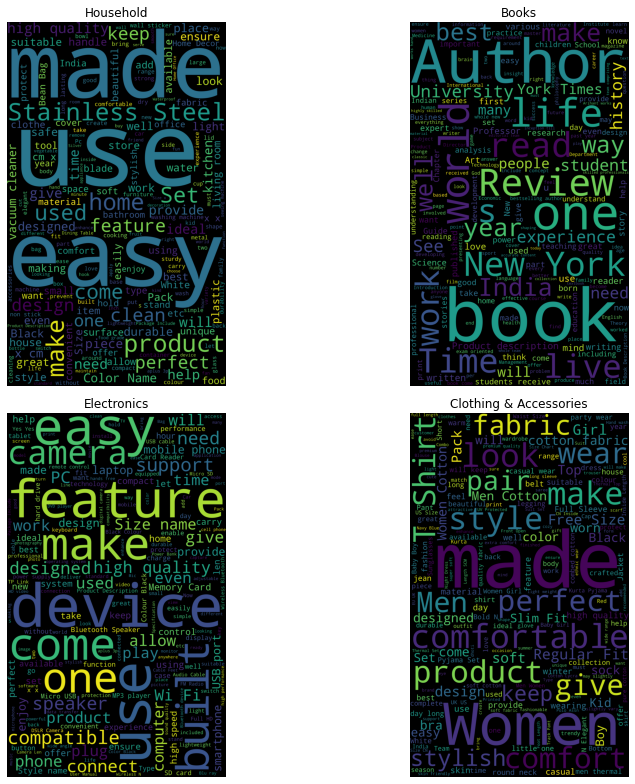

In [14]:
from matplotlib import figure

axes = []
fig = plt.figure(figsize=(14,11), frameon=True)

rows = 2
cols = 2

for lab in range(0,len(labels)):                                                 # Iterate through all the 4 labels
  
  # Extract data for specific labels 
  df = ecomm[ecomm['Label'] == labels[lab]]

  # Call word cloud functions

  wordCloud = word_cloud(df)
  
  # Plot the word clouds 
  axes.append(fig.add_subplot(rows, cols, lab+1))
  
  fig.add_subplot(rows , cols , lab+1)
  plt.imshow(wordCloud)

  axes[-1].set_title(labels[lab], fontsize=30)  
  
  
  plt.axis('off')
  plt.title(labels[lab])

fig.tight_layout()    
plt.show()

***Observation***

* Household Word Cloud : Household wordcloud clearly describes the features associated with the household items. "easy", "made", "use" are very popular words. 

* Book Word Cloud : This clearly indicates all the words related to the book. The most popular words are "Author", "book" , "world" & "India" 

* Electronic Word Cloud : This word cloud descibes electronic devices

* "Clothing & Assessories" word cloud : Clearly indicates feminine related cloths and accessories 

* Above word cloud indicates products are correctly classified in dataset , so its good data for analysis

## Text Preprocessing

In [15]:
sw_nltk = stopwords.words('english')                                              # All the English Stopwords
sw_nltk = list(set(sw_nltk))                                                      # Convert stopwords into a list

lemmatizer = WordNetLemmatizer()                                                   
# Print the list of the stopwords
print(sw_nltk)

['each', 'itself', "you'll", 'whom', 'have', "hadn't", 'her', 'above', 'these', "didn't", 'most', 'further', 'yourselves', 'y', "needn't", 'theirs', "she's", 'you', 'his', "you've", 'so', 'd', 'their', 'other', "doesn't", 'has', 'what', "hasn't", 'off', 'again', 'does', 'weren', 'why', "wouldn't", 'at', 'they', 'is', 'below', 'all', "don't", "that'll", 'after', 'o', "wasn't", 'hasn', 'there', "it's", 'out', 'll', 'we', 'shouldn', 'needn', "haven't", 'or', 'up', 'during', "won't", 'mustn', "you're", 'who', 'couldn', 'more', 'himself', 'wouldn', 'not', 'this', 'had', 'in', 'few', 'that', 'am', 'm', 'through', 've', 'i', 'hadn', 'will', 'very', 'just', "couldn't", 'herself', 'him', 'if', 'such', "should've", 'for', 're', "aren't", 'where', 'he', 'too', 'don', 'isn', 'was', 'a', "mustn't", 'doing', 'down', 'here', 't', 'my', 'before', 'me', 'to', 'ma', 'own', 'the', 'doesn', 'as', 'how', 'with', "isn't", 'myself', 'having', 'aren', 'shan', 'won', 'been', "you'd", 'when', 'an', 'any', 'them

### Preprocessing function 

* Removal of HTML Tags
* Replace Contractions in a string
* Converting Text to Lower for preprocessing
* Converting Text to Lower
* Removing special charaters from Tert
* Removing punctuation from text
* Stopword Removal
* Lemmatization


In [16]:
# A fuction for pre-process the text 

def document_pre_process(text):

  # HTML Tag Removal

  text = BeautifulSoup(text , "html.parser")                                      # BeautifulSoup to remove HTML tags
  text = text.get_text(separator=' ')                                             # Replace HTML Tags with space

  # Remove the contractions from the Text

  text = contractions.fix(text)

  # Remove digit from the text
  text = re.sub(r"\d+" , "" , text )

  # Convert to Lowercase then Tokenize the text   
  text = text.lower()
  words = word_tokenize(text)

# remove special charaters using unicodedata database
  new_words = []
  for word in words :
    new_word = unicodedata.normalize('NFKD', word).encode('ascii','ignore').decode('utf-8','ignore')
    new_words.append(new_word)

  words = new_words

  # Remove the punctuation using regex

  new_words = []
  for word in words :
    new_word = re.sub('[^a-zA-Z]', '', word)
    if new_word != '' :
      new_words.append(word)

  words = list(set(new_words))
  
  # Remove anything except spaces and word using regex
  new_words = [] 
  for word in words :
    new_word = re.sub('[^\w\s]', '', word)
    if new_word != '' :
      new_words.append(word)

  words = new_words

  # Remove the stopwords

  new_words = []
  for word in words :
    if word not in sw_nltk:
      new_words.append(word)

  words = new_words
  
  # Normalize inflectional and derivational form of words using lemmatization  
  new_words = []
  for word in words :
    new_words.append(lemmatizer.lemmatize(word , pos='v'))

  words = new_words
  
  # Join all the tokenized words
  text = ' '.join(words)

  
  # Strip any extra spaces 
  text = text.strip()

  return text

In [17]:
for cnt in range(0 , ecomm.shape[0]) :
  ecomm['Text'][cnt] = document_pre_process(ecomm['Text'][cnt])


In [18]:
# Display the top five row after preprocessing and joing words together
ecomm.head()

,Label,Text
0,Household,leave easily take limit suitable one hang straight rack room home cm hat scarves visit pink stand medals guests stylish steel iron show stand especially eye home cupboards bag occupy make accessories clothe room styleys easy work hang piece coat grab dimension stand hangman hook .kg handbags drawers shelve color x coat weight achievement white creative colour fashion great items space less name compare decor keep hanger peg always material black bedroom rack smart
1,Household,deluxe cco-bkn opener easy convenience accent fit electric chrome power single-touc nicely countertop name appliances size cuisinart elegant color come open style black contour together modern none
2,Household,terminals come screw white captive cadmium pack penta spark conceal shield protection amp switch ip -way anchor contact silver
3,Clothing & Accessories,track cheater proline jacket wind block polyester men 's detail neck high weave colour
4,Household,knives come finish fine system cms give table insert stage heavy unique first mini one sharper still straight non-slip time light instructions damage touch strong feature pressure sharpen -degree second size repeat grip knife control ceramic 's sharpen feature edge already small quick base dull key easy flexibility place tiny sharp carbide hone slot.also coarse slot grams angle color x pull slot top stability back last weight chef white help blade use long apply pass garage hard less make bigger step sharpener counter add black blades towards kitchen


In [19]:
# Label encoding Label column in the DataSet (Converting Label into Numerical field)
label_encoder = preprocessing.LabelEncoder()

label_encoder.fit(ecomm['Label'])

print("List the Label Class " , list(label_encoder.classes_))

ecomm['Label'] = label_encoder.transform(ecomm['Label'])

List the Label Class  ['Books', 'Clothing & Accessories', 'Electronics', 'Household']


In [20]:
# Print Datatype of the "Label" column of dataset after Label encoding
print("Data type of Label column ",ecomm.Label.dtypes)

Data type of Label column  int64


In [21]:
# Print first 5 rows of Dataset after Label encoding
ecomm.head()

,Label,Text
0,3,leave easily take limit suitable one hang straight rack room home cm hat scarves visit pink stand medals guests stylish steel iron show stand especially eye home cupboards bag occupy make accessories clothe room styleys easy work hang piece coat grab dimension stand hangman hook .kg handbags drawers shelve color x coat weight achievement white creative colour fashion great items space less name compare decor keep hanger peg always material black bedroom rack smart
1,3,deluxe cco-bkn opener easy convenience accent fit electric chrome power single-touc nicely countertop name appliances size cuisinart elegant color come open style black contour together modern none
2,3,terminals come screw white captive cadmium pack penta spark conceal shield protection amp switch ip -way anchor contact silver
3,1,track cheater proline jacket wind block polyester men 's detail neck high weave colour
4,3,knives come finish fine system cms give table insert stage heavy unique first mini one sharper still straight non-slip time light instructions damage touch strong feature pressure sharpen -degree second size repeat grip knife control ceramic 's sharpen feature edge already small quick base dull key easy flexibility place tiny sharp carbide hone slot.also coarse slot grams angle color x pull slot top stability back last weight chef white help blade use long apply pass garage hard less make bigger step sharpener counter add black blades towards kitchen


## Vectorization

### Bag Of Words ( CountVectorizer)

In [22]:
# Vectorization ( convert Text Data to Numerical) using Bag of word
ecomm_cnt_vect = CountVectorizer(max_features=2000)                              # Convert text documents to a matrix of token counts. Build Vacabulary of 2000 features

ecomm_count_features = ecomm_cnt_vect.fit(ecomm['Text'])                         # Learn the vacabulary dictionary of all the tokens in raw document

# summarize
print(ecomm_count_features.vocabulary_)                                          # Print 2000 vacabulary

ecomm_count_features = ecomm_cnt_vect.transform(ecomm['Text'])                   # Transform document in the document term matrix
ecomm_count_features = ecomm_count_features.toarray()                            # Convert matrix into an array

{'leave': 992, 'easily': 534, 'take': 1746, 'limit': 1014, 'suitable': 1720, 'one': 1213, 'hang': 808, 'straight': 1695, 'rack': 1411, 'room': 1499, 'home': 849, 'cm': 308, 'hat': 817, 'visit': 1896, 'pink': 1302, 'stand': 1669, 'guests': 796, 'stylish': 1714, 'steel': 1679, 'iron': 932, 'show': 1579, 'especially': 592, 'eye': 637, 'bag': 135, 'make': 1055, 'accessories': 12, 'clothe': 307, 'easy': 535, 'work': 1972, 'piece': 1299, 'coat': 312, 'grab': 777, 'dimension': 484, 'hook': 851, 'kg': 951, 'drawers': 510, 'shelve': 1570, 'color': 320, 'weight': 1931, 'white': 1940, 'creative': 411, 'colour': 322, 'fashion': 653, 'great': 781, 'items': 936, 'space': 1639, 'less': 1000, 'name': 1167, 'compare': 339, 'decor': 442, 'keep': 948, 'hanger': 809, 'always': 58, 'material': 1072, 'black': 184, 'bedroom': 163, 'smart': 1614, 'convenience': 382, 'accent': 9, 'fit': 687, 'electric': 559, 'chrome': 288, 'power': 1338, 'single': 1591, 'appliances': 88, 'size': 1595, 'elegant': 565, 'come': 3

In [23]:
print("After count vectorization \n " , "Number of rows " , ecomm_count_features.shape[0] , "\n Number of Columns " ,ecomm_count_features.shape[1])


After count vectorization 
  Number of rows  50423 
 Number of Columns  2000


In [24]:
print("Type of the count features " , type(ecomm_count_features))
print("Sample count feature Data \n " , ecomm_count_features)

Type of the count features  <class 'numpy.ndarray'>
Sample count feature Data 
  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### Split Dataset (Bag Of Word)

In [25]:
# Split the data into training and testing sets

X = ecomm_count_features
y = ecomm.Label

X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.30 , random_state=42)

#### Base Model (random Forest)

In [26]:
# Using RandomForest classifier , build model for product classification


forest = RandomForestClassifier(n_estimators=10 , n_jobs=4 )                     # Randomforest classifiers with 10 estimators (Number of Trees in the forest) with 4 parallel jobs
      
forest = forest.fit(X_train, y_train)                                            # Build the forest tree

# Claculate the cross validation scores

scores = cross_val_score(forest, X, y, cv=10 , scoring='accuracy')
print("cross validation scores \n " ,scores)
print("Mean Score : " , np.mean(scores) , "\nStandard Deviation : " ,np.std(scores))



cross validation scores 
  [0.96866944 0.96847115 0.96847115 0.97223324 0.9714399  0.9696549
 0.96806823 0.96667989 0.97124157 0.97104324]
Mean Score :  0.9695972706914112 
Standard Deviation :  0.0017142858738446243


#### Model Optimization (Bag Of Word) 

In [27]:
# Finding Optimal Number of base learner using k-fold CV
base_ln = [x for x in range(1,25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [28]:
# K-Fold Cross Validation scores

cv_scores = []
for b in base_ln :
  clf = RandomForestClassifier(n_estimators=b)
  scores = cross_val_score(clf , X_train , y_train ,  cv=5 ,scoring= 'accuracy')
  cv_scores.append(scores.mean())

print(" Cross Validation Scores \n" , cv_scores)

 Cross Validation Scores 
 [0.8856810886148999, 0.8782012876495842, 0.9241838859599805, 0.9336751106718083, 0.9414380613100347, 0.945574484103431, 0.9469910792362392, 0.9517224911681268, 0.9518924467870361, 0.9526291271424541, 0.9549522298297595, 0.9543573410192602, 0.9550089271847524, 0.9558589340271215, 0.9554623254343099, 0.9565388688701102, 0.9573888155156839, 0.9571904911536796, 0.9560855629223056, 0.956085582987904, 0.9571338740610805, 0.9569638341666578, 0.9575305147588496, 0.9574738214169762]


Optimal learner which has least errors  23


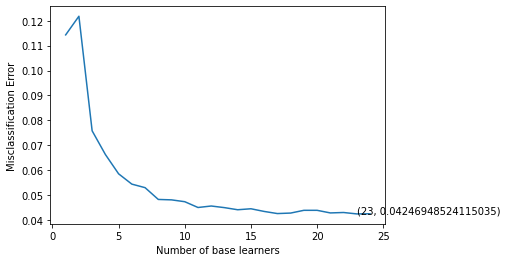

In [29]:
# Plotting Errors

error = [1- x for x in cv_scores]                                                # Errors from the cross validation
optimal_learners = base_ln[error.index(min(error))]                              # Determin optimal learner with minimum error

print("Optimal learner which has least errors " , optimal_learners)


plt.plot(base_ln, error)                                                         #Plot between each number of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()


***Observation***
* Optimal number of trees for the forest is 24 , which has minimum error

#### Key Metrices (Bag Of Word)

In [30]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)                    # RandomForest with optimal number of errors whith leat amount of errors
clf.fit(X_train, y_train)                                                        # Fit the Model 

print("Test dataset Accuracy score : " , clf.score(X_test, y_test))


Test dataset Accuracy score :  0.965954915052555


In [31]:
count_vectorizer_predicted = clf.predict(X_test)

print(classification_report(y_test ,count_vectorizer_predicted , target_names = label_encoder.classes_))

print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))

                        precision    recall  f1-score   support

                 Books       0.97      0.96      0.97      3590
Clothing & Accessories       0.97      0.97      0.97      2596
           Electronics       0.97      0.95      0.96      3167
             Household       0.96      0.97      0.96      5774

              accuracy                           0.97     15127
             macro avg       0.97      0.97      0.97     15127
          weighted avg       0.97      0.97      0.97     15127

Accuracy of the model is :  0.965954915052555


#### Confusion Matix (Bag Of Word)

In [32]:
# Prediction on Test dataset
result =  clf.predict(X_test)

F1 score :  0.965954915052555

Confusion Matrix Dataframe                         Books  Clothing & Accessories  Electronics  Household
Books                    3459                      19           23         89
Clothing & Accessories     20                    2531            8         37
Electronics                23                      13         3014        117
Household                  58                      59           49       5608


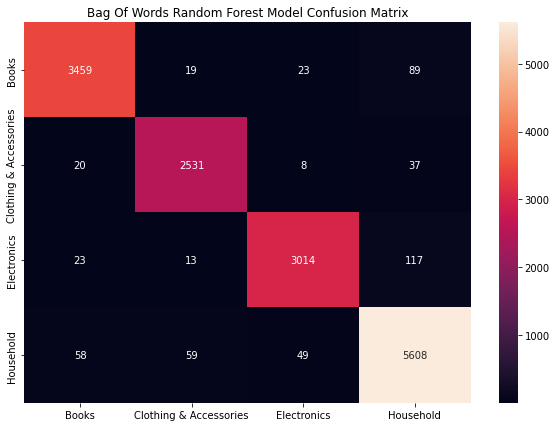

In [33]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

conf_mat = confusion_matrix(y_test, result)                                      # Confusion metrix between test and predicted


                     

print("F1 score : " , metrics.f1_score(y_test, result,average='micro'))          # F1 score for multiclass/multilabel target

df_cm = pd.DataFrame(conf_mat, index = [i for i in label_encoder.classes_],
                  columns = [i for i in label_encoder.classes_])                 # Dataframe for confusion matix 

# Print Confusion Metrix 

print("\nConfusion Matrix Dataframe" , df_cm)

plt.figure(figsize = (10,7))
# Heatmap for confusion matrix dataframe
sns.heatmap(df_cm, annot=True, fmt='g')

plt.title("Bag Of Words Random Forest Model Confusion Matrix")

plt.show()

***Observation***

* The confusion metrix clearly indicates that 96% of time model is correctly predicting or classifying the product.


#### Word Cloud (Count Vectorizer)

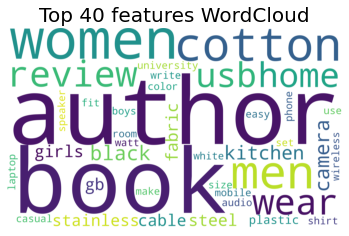

In [34]:
all_features = ecomm_cnt_vect.get_feature_names()                                #Instantiate the feature from the vectorizer
top_features=''                                                                  # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=5000, 
                          height=3000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(40, 40), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

***Observation***
* "book" is most frequntly used word followed by "Women".
* "men", author and cotton are 3rd most popular words.

### TF-IDF

### TF-IDF Vectorization

In [35]:
# Vectorization - Convert data into number using Term Frequncy and Inverse Document Frequency (TF-IDF)

ecomm_tfidf_vect = TfidfVectorizer(max_features=2000)                            # Convert text documents to a matrix of token counts. Build Vacabulary of 2000 features

ecomm_tfidf_features = ecomm_tfidf_vect.fit(ecomm['Text'])                       # Learn the vacabulary dictionary of all the tokens in raw document

# summarize
print(ecomm_tfidf_features.vocabulary_)                                          # Print 2000 vacabulary

ecomm_tfidf_features = ecomm_tfidf_vect.transform(ecomm['Text'])                 # Transform document in the document term matrix
ecomm_tfidf_features = ecomm_tfidf_features.toarray()                            # Convert matrix into an array

{'leave': 992, 'easily': 534, 'take': 1746, 'limit': 1014, 'suitable': 1720, 'one': 1213, 'hang': 808, 'straight': 1695, 'rack': 1411, 'room': 1499, 'home': 849, 'cm': 308, 'hat': 817, 'visit': 1896, 'pink': 1302, 'stand': 1669, 'guests': 796, 'stylish': 1714, 'steel': 1679, 'iron': 932, 'show': 1579, 'especially': 592, 'eye': 637, 'bag': 135, 'make': 1055, 'accessories': 12, 'clothe': 307, 'easy': 535, 'work': 1972, 'piece': 1299, 'coat': 312, 'grab': 777, 'dimension': 484, 'hook': 851, 'kg': 951, 'drawers': 510, 'shelve': 1570, 'color': 320, 'weight': 1931, 'white': 1940, 'creative': 411, 'colour': 322, 'fashion': 653, 'great': 781, 'items': 936, 'space': 1639, 'less': 1000, 'name': 1167, 'compare': 339, 'decor': 442, 'keep': 948, 'hanger': 809, 'always': 58, 'material': 1072, 'black': 184, 'bedroom': 163, 'smart': 1614, 'convenience': 382, 'accent': 9, 'fit': 687, 'electric': 559, 'chrome': 288, 'power': 1338, 'single': 1591, 'appliances': 88, 'size': 1595, 'elegant': 565, 'come': 3

In [36]:
print("After TF IDF vectorization \n " , "Number of rows " , ecomm_tfidf_features.shape[0] , "\n Number of Columns " ,ecomm_tfidf_features.shape[1])

After TF IDF vectorization 
  Number of rows  50423 
 Number of Columns  2000


In [37]:
print("Type of the Tfidf features " , type(ecomm_tfidf_features))
print("Sample tfidf feature Data \n " , ecomm_tfidf_features)

Type of the Tfidf features  <class 'numpy.ndarray'>
Sample tfidf feature Data 
  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### Split Dataset (TF-IDF)

In [38]:
# Split the data into training and testing sets

X = ecomm_tfidf_features
y = ecomm.Label

X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.30 , random_state=42)

#### Base Model (Random Forest)

In [39]:
# Using RandomForest classifier , build model for product classification


tfidf_forest = RandomForestClassifier(n_estimators=10 , n_jobs=4 )               # Randomforest classifiers with 10 estimators (Number of Trees in the forest) with 4 parallel jobs
      
tfidf_forest = tfidf_forest.fit(X_train, y_train)                                # Build the forest tree

# Calculate the cross validation scores

tfidf_scores = cross_val_score(tfidf_forest, X, y, cv=10 , scoring='accuracy')
print("cross validation scores \n " ,tfidf_scores)
print("Mean Score : " , np.mean(tfidf_scores) , "\nStandard Deviation : " ,np.std(tfidf_scores))


cross validation scores 
  [0.97104898 0.96807456 0.96728138 0.97104324 0.9690599  0.96767156
 0.96925823 0.96826656 0.96846489 0.97659659]
Mean Score :  0.9696765885577607 
Standard Deviation :  0.0026071624767042578


#### Key Metrices (TF-IDF)

In [40]:
# K-Fold Cross Validation scores

cv_scores = []
for b in base_ln :
  clf = RandomForestClassifier(n_estimators=b)
  scores = cross_val_score(clf , X_train , y_train ,  cv=5 ,scoring= 'accuracy')
  cv_scores.append(scores.mean())

print(" Cross Validation Scores \n" , cv_scores)

 Cross Validation Scores 
 [0.8843493549110752, 0.8817146776240886, 0.9256289622032348, 0.9356299534437985, 0.9409563304354597, 0.9450644446825562, 0.9481526044946138, 0.9493425225748016, 0.9521190716691006, 0.9522607829516254, 0.9531107295971992, 0.9536490374331766, 0.9533090419198444, 0.9544139300200214, 0.9547539375727127, 0.955575599750705, 0.9552922253430916, 0.9550939732172419, 0.9555189184481907, 0.9553205338893912, 0.9555188702907544, 0.9566805039033609, 0.9554338924813, 0.9556039243494834]


#### Error Plotting

Optimal learner which has least errors  22


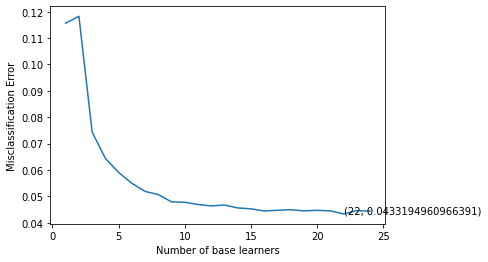

In [41]:
# Plotting Errors

error = [1- x for x in cv_scores]                                                # Errors from the cross validation
optimal_learners = base_ln[error.index(min(error))]                              # Determin optimal learner with minimum error

print("Optimal learner which has least errors " , optimal_learners)


plt.plot(base_ln, error)                                                         #Plot between each number of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()


***Observation***
* Optimal number of trees for the forest is 21 , which has minimum error

#### Model Optimization( TF-IDF RandomForest)

In [42]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)                    # RandomForest with optimal number of errors whith leat amount of errors
clf.fit(X_train, y_train)                                                        # Fit the Model 

print("Test dataset Accuracy Score : " , clf.score(X_test, y_test))

Test dataset Accuracy Score :  0.9664837707410591


In [43]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)                    # RandomForest with optimal number of errors whith leat amount of errors
clf.fit(X_train, y_train)                                                        # Fit the Model 

print("Accuracy on test Score" , clf.score(X_test, y_test))

Accuracy on test Score 0.965492166325114


#### Confusion Matrix (TF-IDF Random Forest Model )

In [44]:
result =  clf.predict(X_test)

0.965492166325114
Confusion Matrix Dataframe                         Books  Clothing & Accessories  Electronics  Household
Books                    3460                      17           21         92
Clothing & Accessories     16                    2529           11         40
Electronics                28                      13         2981        145
Household                  41                      49           49       5635


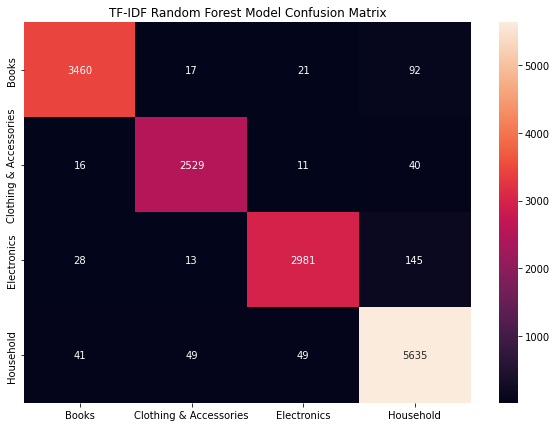

In [45]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)



print(metrics.f1_score(y_test, result,average='micro'))

# Dataframe for confusion metrics

df_cm = pd.DataFrame(conf_mat, index = [i for i in label_encoder.classes_],
                  columns = [i for i in label_encoder.classes_])

print("Confusion Matrix Dataframe" ,df_cm)

# Heatmap for confusion matrix dataframe
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title("TF-IDF Random Forest Model Confusion Matrix")
plt.show()

***Observation***

* The confusion matrix clearly indicates that there is not much of the differnce in accuracy between Bag Of Word and TF-IDF , Random forest model.

#### Word Cloud (TD-IDF)

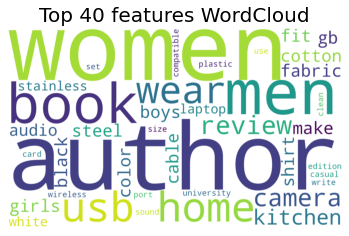

In [46]:
all_features = ecomm_tfidf_vect.get_feature_names()                              #Get all the features from TF-IDF vector

top_features=''                                                                  # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_

features=np.argsort(feat)[::-1]

# Top 40 features
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
# Word Cloud 
wordcloud = WordCloud(background_color="white",colormap='viridis',width=5000, 
                          height=3000).generate(top_features)

# Display the word cloud image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(40, 40), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

***Observation***

* Term (word) frequncy in TF-IDF is little differnt than Bag of Word (Count Vectorizer)

* "author" and "book" seems to have same frequncy across all corpus

* "women" is nest popular term across the corpus.   

## Summary

* For e-commerce product categorization dataset , there are 4 product categories (i.e. Books, Clothing & Accessories, Electronics and Household) in dataset . 

* The goal was to build a model for text-classification for product categorization.

* Data were pre-processed (null row removal , label encoding) the data using various techniques and libraries.

* Text preprocessing techniques such as html tag removal, stopword removal, lemmatization ect. were also applied.

* Word Cloud plot was created befoe (for each products) and after modelling (top 40 features) for Bag Of word and TF-IDF.

* "book" is most popular term.

* The pre-processed data is converted to numbers (vectorized), so that data can be fewd to the Model.

* Models were trained and optimized which has increased over all frequency.

* There is not much differnce in model performance for Bag Of word & TF-IDF 

* After building the classification model, test data was used for prediction.

* We saw that using the above techniques, our model performed well in perspective of how text classification models perform.

* max_feature parameter can be increaed in the vectorizer.

* The model tuning and hyperparameter tuning techniques , as well as other pre-processing techniques can be applied to increase the overall accuracy even furth